In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

In [2]:
df=pd.read_csv('/content/Processed_Data_v2.zip')

In [3]:
df.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CLASS TYPE
0,2021-09-11,09:35:00,40.667202,-73.866500,Unspecified,No factor,No factor,No factor,No factor,Sedan,No vehicle,No vehicle,No vehicle,No vehicle,Class 0
1,2021-12-14,08:17:00,40.868160,-73.831480,Unspecified,Unspecified,No factor,No factor,No factor,Sedan,Sedan,No vehicle,No vehicle,No vehicle,Class 1
2,2021-12-14,14:58:00,40.751440,-73.973970,Passing Too Closely,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
3,2021-12-14,16:50:00,40.675884,-73.755770,Turning Improperly,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
4,2021-12-11,19:43:00,40.872620,-73.904686,Unspecified,Unspecified,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,Sedan,No vehicle,No vehicle,No vehicle,Class 1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057417 entries, 0 to 1057416
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1057417 non-null  object 
 1   CRASH TIME                     1057417 non-null  object 
 2   LATITUDE                       1057417 non-null  float64
 3   LONGITUDE                      1057417 non-null  float64
 4   CONTRIBUTING FACTOR VEHICLE 1  1057417 non-null  object 
 5   CONTRIBUTING FACTOR VEHICLE 2  1057417 non-null  object 
 6   CONTRIBUTING FACTOR VEHICLE 3  1057417 non-null  object 
 7   CONTRIBUTING FACTOR VEHICLE 4  1057417 non-null  object 
 8   CONTRIBUTING FACTOR VEHICLE 5  1057417 non-null  object 
 9   VEHICLE TYPE CODE 1            1057417 non-null  object 
 10  VEHICLE TYPE CODE 2            1057417 non-null  object 
 11  VEHICLE TYPE CODE 3            1057417 non-null  object 
 12  VEHICLE TYPE C

In [5]:
df.isna().sum()

CRASH DATE                       0
CRASH TIME                       0
LATITUDE                         0
LONGITUDE                        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
CLASS TYPE                       0
dtype: int64

In [7]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       447741
Driver Inattention/Distraction    261599
Failure to Yield Right-of-Way      83012
Following Too Closely              73831
Backing Unsafely                   49069
Other Vehicular                    32592
Passing or Lane Usage Improper     31680
Turning Improperly                 27625
Fatigued/Drowsy                    25867
Passing Too Closely                24401
Name: count, dtype: int64

In [8]:
df['CLASS TYPE'].value_counts()

CLASS TYPE
Class 0    824193
Class 1    231289
Class 2      1030
Class 3       905
Name: count, dtype: int64

In [9]:
print(df['CLASS TYPE'].unique())

['Class 0' 'Class 1' 'Class 3' 'Class 2']


In [10]:
df['CLASS TYPE'] = df['CLASS TYPE'].replace({'Class 0': 0, 'Class 1': 1, 'Class 2': 2, 'Class 3': 3})

In [11]:
print(df['CLASS TYPE'].unique())

[0 1 3 2]


In [12]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

<ipython-input-12-b6c7147c979f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])


In [13]:
df['YEAR'] = df['CRASH DATE'].dt.year
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day
df['HOUR'] = df['CRASH TIME'].dt.hour
df['MINUTE'] = df['CRASH TIME'].dt.minute
df.drop(['CRASH DATE', 'CRASH TIME'], axis=1, inplace=True)


In [15]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CLASS TYPE', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'MINUTE'],
      dtype='object')

In [34]:
df.head()

,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CLASS TYPE,YEAR,MONTH,DAY,HOUR,MINUTE
0,40.667202,-73.866500,Unspecified,No factor,No factor,No factor,No factor,Sedan,No vehicle,No vehicle,No vehicle,No vehicle,0,2021,9,11,9,35
1,40.868160,-73.831480,Unspecified,Unspecified,No factor,No factor,No factor,Sedan,Sedan,No vehicle,No vehicle,No vehicle,1,2021,12,14,8,17
2,40.751440,-73.973970,Passing Too Closely,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,0,2021,12,14,14,58
3,40.675884,-73.755770,Turning Improperly,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,0,2021,12,14,16,50
4,40.872620,-73.904686,Unspecified,Unspecified,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,Sedan,No vehicle,No vehicle,No vehicle,1,2021,12,11,19,43


# Feature Selection

In [17]:
encoder = LabelEncoder()
encoded_data = df.apply(encoder.fit_transform)

In [19]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(encoded_data.drop('CLASS TYPE', axis=1), encoded_data['CLASS TYPE'])
print("Selected Features: %s" % fit.support_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features: [False False False False False  True  True False  True  True  True False
 False False False False False]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
X = encoded_data.drop('CLASS TYPE', axis=1)
y = encoded_data['CLASS TYPE']

In [26]:
X.head()

,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,MONTH,DAY,HOUR,MINUTE
0,35686,56372,9,4,4,4,4,5,2,1,1,0,9,8,10,9,35
1,105387,65744,9,9,4,4,4,5,6,1,1,0,9,11,13,8,17
2,72074,25798,6,9,4,4,4,5,7,1,1,0,9,11,13,14,58
3,39431,81268,8,9,4,4,4,5,7,1,1,0,9,11,13,16,50
4,106515,45581,9,9,4,4,4,6,6,1,1,0,9,11,10,19,43


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [24]:
y_pred = rfe.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.7894828923228234


In [25]:
ranking = rfe.ranking_
feature_names = X.columns

top_features = [feature for feature, rank in zip(feature_names, ranking) if rank == 1]

print("Top Selected Features:")
print(top_features)

Top Selected Features:
['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'VEHICLE TYPE CODE 2', 'YEAR']


In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
importances = model.feature_importances_
feature_names = X.columns
feature_imports = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_imports.sort_values(by='Importance', ascending=False))

                          Feature  Importance
1                       LONGITUDE    0.153568
0                        LATITUDE    0.153330
14                            DAY    0.106487
8             VEHICLE TYPE CODE 2    0.105733
16                         MINUTE    0.094176
15                           HOUR    0.089477
13                          MONTH    0.073678
12                           YEAR    0.071763
2   CONTRIBUTING FACTOR VEHICLE 1    0.062461
3   CONTRIBUTING FACTOR VEHICLE 2    0.035790
7             VEHICLE TYPE CODE 1    0.034333
9             VEHICLE TYPE CODE 3    0.010554
4   CONTRIBUTING FACTOR VEHICLE 3    0.004979
10            VEHICLE TYPE CODE 4    0.001939
5   CONTRIBUTING FACTOR VEHICLE 4    0.000927
11            VEHICLE TYPE CODE 5    0.000495
6   CONTRIBUTING FACTOR VEHICLE 5    0.000313


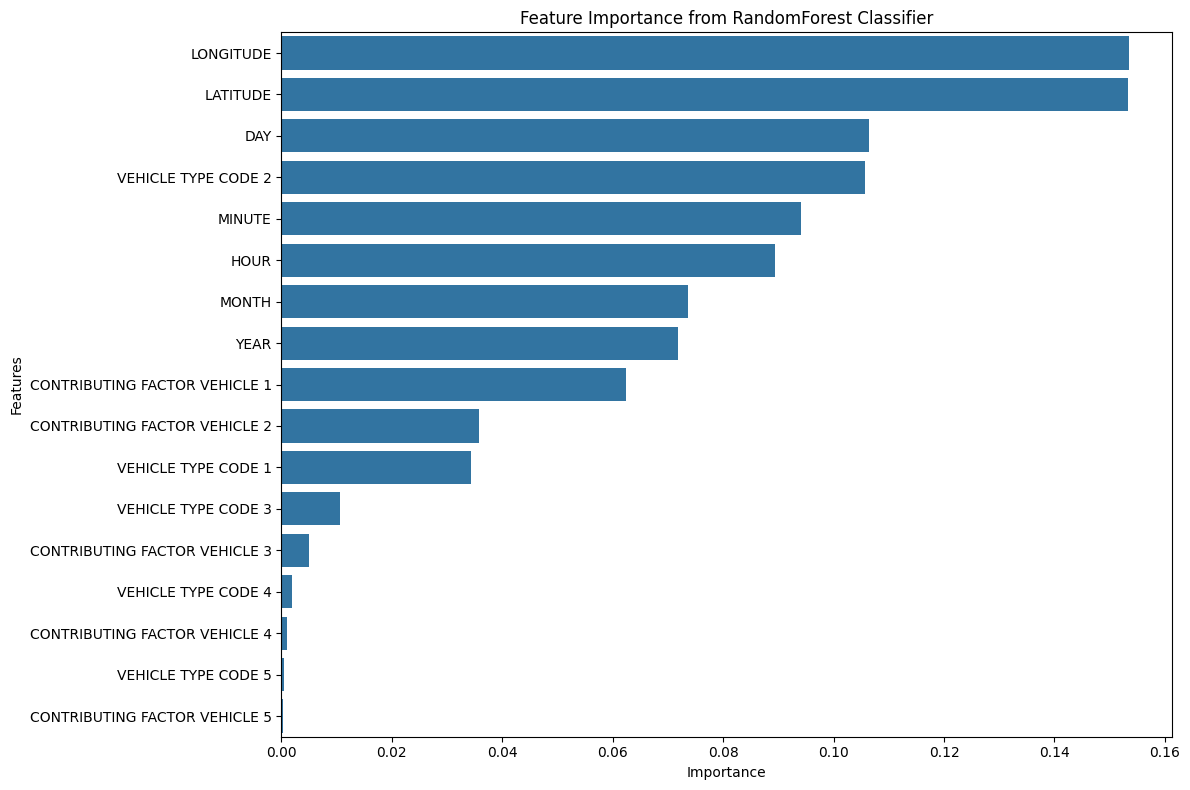

In [29]:
sorted_feature_imports = feature_imports.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_imports)
plt.title('Feature Importance from RandomForest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [31]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.780


In [35]:


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.7789796  0.77892049 0.77905052 0.77897698 0.77920159 0.77903609
 0.77879966 0.77891788 0.7790952  0.7787642 ]
CV accuracy: 0.779 +/- 0.000


In [38]:

weights = {0: 1, 1: 3, 2: 50, 3: 50}

model = LogisticRegression(class_weight=weights, max_iter=1000)

model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80    165012
           1       0.37      0.52      0.43     46095
           2       0.01      0.01      0.01       198
           3       0.00      0.00      0.00       179

    accuracy                           0.70    211484
   macro avg       0.31      0.32      0.31    211484
weighted avg       0.74      0.70      0.71    211484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88    165012
           1       0.55      0.41      0.47     46095
           2       0.04      0.01      0.01       198
           3       0.00      0.00      0.00       179

    accuracy                           0.80    211484
   macro avg       0.36      0.33      0.34    211484
weighted avg       0.78      0.80      0.79    211484

